# Logistic Regression of Titanic dataset

Inspired by https://github.com/bonartm/titanic

![Titanic survival rate modelled with logistic Regression](titanic.png)

A simple descriptiv Logistic Regression model of the survial rate on the Titanic using Passenger Class (Pclass), Sex and Age and their interactions as predictors in a R-like fashion.
```
Survived ~ C(Pclass) + C(Sex) + Age + C(Pclass):C(Sex) + C(Pclass):Age + C(Sex):Age
```



The R-Version takes about 35 lines of code. This notebook features about 27 lines of code.

 * statsmodels seems comparable to R fitting
 * For the expand.grid functionality a custom function had to be written. [see pandas cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#creating-example-data)
 * 5% to 95% happend to be the default for the confidence bands
 * customisation of the plot is not as straight forward as in R including:
   * titles of the x-axes not combined
   * Title + subtitle needs some more attention: fontsize, alignement
   
   
   


In [1]:
# Read data
import pandas as pd
data = pd.read_csv("titanic.csv")

In [2]:
# Fit logistic regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

FORM = 'Survived ~ C(Pclass) + C(Sex) + Age + C(Pclass):C(Sex) + C(Pclass):Age + C(Sex):Age'
model = smf.glm(formula=FORM, data=data, family=sm.families.Binomial(), missing="drop")
result = model.fit()

In [3]:
# Create artificial data and predict over the parameterspace
import itertools

def expand_grid(**data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Generate a grid of the parameter space for predictions and plotting
# Survived is not used, but allows to use FORM on artificial data 
ndat = expand_grid(Survived=[1], Sex=['male','female'], Age=range(0,71), Pclass=[1,2,3])

ypred = result.get_prediction(ndat, transform=True).summary_frame()

ndm = pd.concat([ndat,ypred], axis=1)
ndm['Pclass'] = ndm['Pclass'].map({1:'First Class', 2:'Second Class', 3:'Third Class'})
ndm.rename(columns={'mean':'P(Survival)'}, inplace=True)

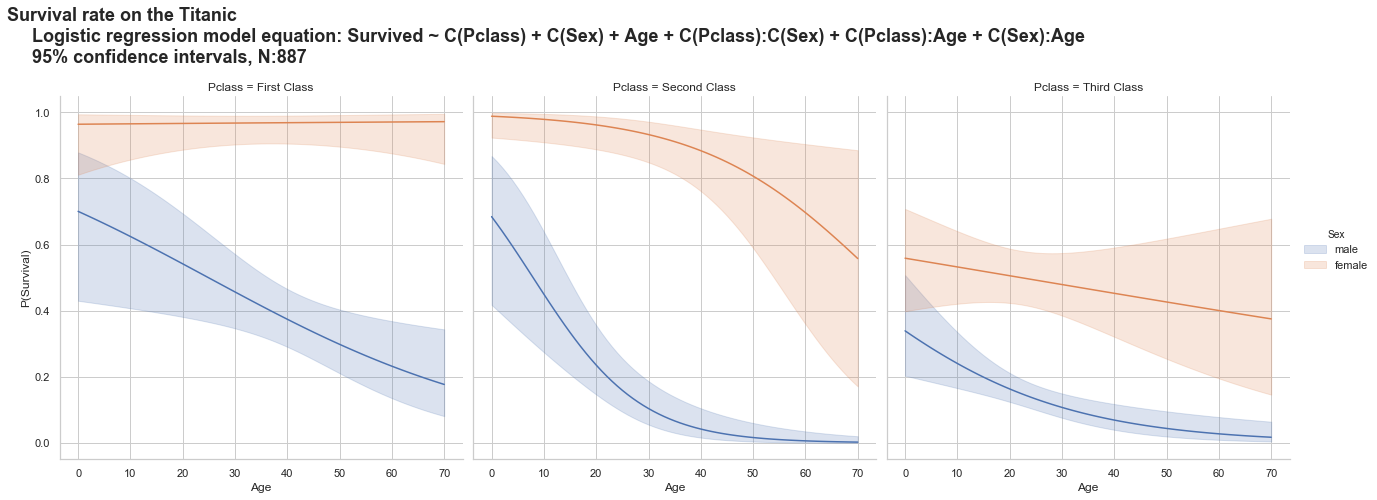

In [5]:
# Plot Survivalrates over the parameter space
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(data=ndm, col="Pclass", hue="Sex", sharey=True, aspect=1, height=6, legend_out=True)
g.map(plt.fill_between, 'Age', 'mean_ci_lower', 'mean_ci_upper', alpha=0.2);
g.map(plt.plot, 'Age', 'P(Survival)', alpha=1.0).add_legend();
g.fig.suptitle( f"Survival rate on the Titanic\n     Logistic regression model equation: {FORM} \n     95% confidence intervals, N:" + str(data.shape[0])
    ,position=(0,1.15), fontweight='bold', size=18, horizontalalignment='left')
g.savefig("titanic.png")